In [1]:
# todo:search for hyper parameters
from sklearn.model_selection import GridSearchCV
# def svc_param_selection(X, y, nfolds):
#     Cs = [0.001, 0.01, 0.1, 1, 10]
#     gammas = [0.001, 0.01, 0.1, 1]
#     param_grid = {'C': Cs, 'gamma' : gammas}
#     grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
#     grid_search.fit(X, y.values.ravel())
#     grid_search.best_params_
#     return grid_search.best_params_

# svc_param_selection(X_train,Y_train,4)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
rs=7

In [79]:
dataNoNa=pd.read_csv('data_noNa.csv')
type(dataNoNa),len(dataNoNa),dataNoNa.head()

(pandas.core.frame.DataFrame,
 1330,
      Depth  CALI   CGR     DT   NPHI  RHOB    RT     SGR  lithofacies
 0  3439.06  8.00  7.77  62.18  13.90  2.69  0.06 -999.25            5
 1  3439.21  8.26  7.50  62.72  13.21  2.66  0.09 -999.25            5
 2  3439.36  8.67  7.07  63.23  12.10  2.62  0.13 -999.25            5
 3  3439.52  8.72  6.88  63.59  11.79  2.58  0.13 -999.25            5
 4  3439.67  8.80  6.59  63.69  11.30  2.53  0.13 -999.25            5)

In [72]:
# rawdata=pd.read_csv("../csvs/log-305.csv")
# dataNoNa=rawdata.dropna()
# type(dataNoNa),len(dataNoNa),dataNoNa.head()

(pandas.core.frame.DataFrame,
 1330,
      Depth  CALI   CGR     DT   NPHI  RHOB    RT     SGR lithofacies
 0  3439.06  8.00  7.77  62.18  13.90  2.69  0.06 -999.25          pk
 1  3439.21  8.26  7.50  62.72  13.21  2.66  0.09 -999.25          pk
 2  3439.36  8.67  7.07  63.23  12.10  2.62  0.13 -999.25          pk
 3  3439.52  8.72  6.88  63.59  11.79  2.58  0.13 -999.25          pk
 4  3439.67  8.80  6.59  63.69  11.30  2.53  0.13 -999.25          pk)

In [80]:
Q1 = dataNoNa.quantile(0.25)
Q3 = dataNoNa.quantile(0.75)
IQR = Q3 - Q1
mask = (dataNoNa.iloc[:,:8] < (Q1 - 1.5 * IQR)) | (dataNoNa.iloc[:,:8] > (Q3 + 1.5 * IQR))
dataNoNa[mask] = np.nan
dataNoNa.dropna(inplace=True)

In [81]:
dataNoNa['lithofacies'].describe()

count    948.000000
mean       4.335443
std        1.581082
min        0.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        6.000000
Name: lithofacies, dtype: float64

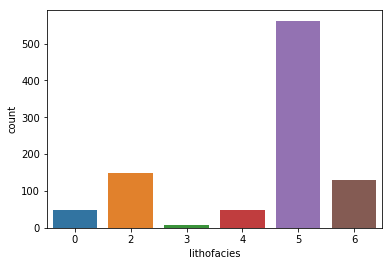

In [82]:
countplot=sns.countplot(dataNoNa['lithofacies'])
c=countplot.get_figure()
c.savefig('../plots/countplot_after_outlier_removal.png')

In [58]:
X=dataNoNa.iloc[:,:8]
y=dataNoNa.iloc[:,8:]
X_train, X_test, Y_train, Y_test =( train_test_split(X, y, 
                                test_size=0.30, random_state=rs))

In [59]:
#same test data as previous models
X_train.index

Int64Index([ 880,  556,  707,   58,  492,  463,  471,   24, 1314,  777,
            ...
             366,  345,  535, 1209,  919,  211,  502,  537, 1220,  175],
           dtype='int64', length=931)

In [60]:
print(len(X_train))
print(len(X_test))

931
399


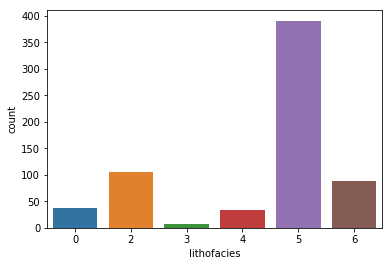

In [14]:
sns.countplot(Y_train['lithofacies'])

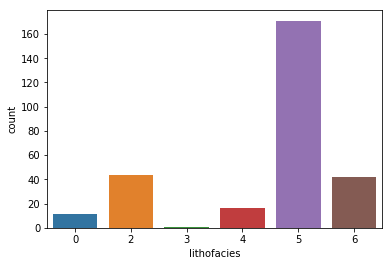

In [15]:
sns.countplot(Y_test['lithofacies'])

In [16]:
from sklearn import svm
scores={}

In [17]:
# from sklearn.preprocessing import normalize

clf_svm = svm.SVC(random_state=rs,gamma=0.01,C=10)
#scaler=StandardScaler()
#X_train_scaled=scaler.fit_transform(X_train,y=Y_tran)
clf_svm.fit(X_train,Y_train.values.ravel())

clf_svm

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=7, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
y_pred=clf_svm.predict(X_test)

In [19]:
scores['f1 SVM-rfb']=f1_score(Y_test, y_pred, average='weighted') 
scores

{'f1 SVM-rfb': 0.9145957808110117}

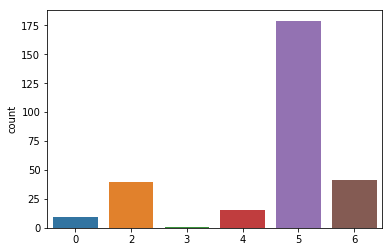

In [20]:
sns.countplot(y_pred)

In [21]:
confusion_matrix(Y_test, y_pred)

array([[  8,   1,   0,   0,   2,   0],
       [  0,  35,   0,   0,   9,   0],
       [  0,   0,   1,   0,   0,   0],
       [  0,   0,   0,  15,   0,   1],
       [  1,   4,   0,   0, 164,   2],
       [  0,   0,   0,   0,   4,  38]])

In [22]:
import matplotlib.pyplot as plt
results=pd.DataFrame()
results['true']=Y_test['lithofacies']
results['pred']=y_pred

results.to_csv('results_svm_rfb.csv')

In [23]:
scores['cohen_kappa_score svm-rfb']=cohen_kappa_score(Y_test, y_pred)
scores

{'f1 SVM-rfb': 0.9145957808110117,
 'cohen_kappa_score svm-rfb': 0.8538274137709962}

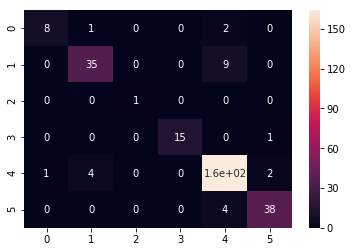

In [24]:
sns.heatmap(confusion_matrix(Y_test, y_pred),annot=True,annot_kws={"size": 10})

### cross validation error

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
# making 5 folds with same distrobutaion
X=dataNoNa.iloc[:,:8]
y=dataNoNa.iloc[:,8:]



X_train1, X_test1, Y_train1, Y_test1 =( train_test_split(X, y, 
                                test_size=0.20, random_state=rs))
X_train2, X_test2, Y_train2, Y_test2 =( train_test_split(X_train1, Y_train1, 
                                test_size=0.25, random_state=rs))
X_train3, X_test3, Y_train3, Y_test3 =( train_test_split(X_train2, Y_train2, 
                                test_size=0.33, random_state=rs))
X_test4, X_test5, Y_test4, Y_test5 =( train_test_split(X_train3, Y_train3, 
                                test_size=0.5, random_state=rs))

print(len(X))
print(len(X_test1))
print(len(X_test2))
print(len(X_test3))
print(len(X_test4))
print(len(X_test5))

data_folds=[X_test1.values,X_test2.values,X_test3.values,X_test4.values,X_test5.values]
label_folds=[Y_test1.values,Y_test2.values,Y_test3.values,Y_test4.values,Y_test5.values]

948
190
190
188
190
190


In [27]:
svm.SVC(random_state=rs,gamma='auto')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=7, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
cross_scores_cohen_kappa=[]
cross_scores_f1=[]
for i in range(0,5):
    print(i)
    scaler=StandardScaler()
    
    X_train=np.concatenate((data_folds[:i]+data_folds[i+1:]), axis=0)
    X_test=data_folds[i]
    Y_train=np.concatenate((label_folds[:i]+label_folds[i+1:]), axis=0)
    Y_test=label_folds[i]
  
    #X_train_scaled=scaler.fit_transform(X_train,y=Y_train)
    #X_test_scaled=scaler.transform(X_test)
    
    clf_svm2 = svm.SVC(random_state=rs,gamma='auto')
    clf_svm2.fit(X=X_train,y=Y_train.ravel())
    y_pred=clf_svm2.predict(X_test)
    
    cross_scores_f1.append(f1_score(Y_test, y_pred, average='weighted') )
    cross_scores_cohen_kappa.append(cohen_kappa_score(Y_test, y_pred) )

0
1
2
3
4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
scores['cross_val_f1score SVM-rfb']=np.array(cross_scores_f1).mean()
scores['cross_val_cohen_kappa_score SVM-rfb']=np.array(cross_scores_cohen_kappa).mean()

scores

{'f1 SVM-rfb': 0.9145957808110117,
 'cohen_kappa_score svm-rfb': 0.8538274137709962,
 'cross_val_f1score SVM-rfb': 0.8612892968948567,
 'cross_val_cohen_kappa_score SVM-rfb': 0.7643023592699638}

In [30]:
cross_scores_f1

[0.8611341556436161,
 0.8618207535325313,
 0.8516630973523232,
 0.8688084680565884,
 0.863020009889224]